### Lectura de los textos

In [1]:
##preparar texto
##se prepara la lista glob que sirve para trabajar con carpetas
import glob
## se define que lista_files es una lista con los nombres de los archivos 
##los cuales están seleccionados como los txt que se encuentran dentro de primer periodo
lista_files = glob.glob('Entrevistas Hasler/*.txt')
##se define un diccionario donde en los keys se encuentran los nombres y en los values el texto
corpus = {}
##por cada archivo en la lista de archivos
for file in lista_files:
##este se abre con encoding utf-8 y queda definido como file_input
    with open(file, 'r', encoding="utf-8") as file_input:
##se toman los nombres de los textos y se le quitan los primeros 15 caracteres (el nombre de la carpeta)
        corpus[file[35:-4]]=file_input.read()
print('Nombre de los textos')
print(corpus.keys()) 
print('  ')     
print('  ')

Nombre de los textos
dict_keys(['om] CH.102013.23mins', 'om] CQBM.112012.40mins', 'om] Entrevistas hasler', 'om] GN.1.112013.5mins', 'om] GN.2.112013.40mins', 'om] HM.052013.12mins', 'om] HM.052013.17mins', 'om] HM.052013.18mins', 'om] HM.052013.27mins', 'om] HM.052013.32mins', 'om] HM.102013.30min', 'om] HM.102013.32mins', 'om] HMySM.052013.18mins', 'om] JNyGN.112013.60mins', 'om] TN.012011.45mins'])
  
  


### Preprocesamiento

In [2]:
##limpieza texto

import string

numeros= []
for numero in list(range(100)):
    numeros+= [numero]
numeros = str(numeros)
numeros

def remover_puntuacion(s): 
    for c in string.punctuation:
        s=s.replace(c,"")
        s=s.replace('\t','')
    return s
def remover_numeros(k): 
    for z in numeros:
        k=k.replace(z," ")
        k=k.replace('pag','')
    return k


#toma el corpus subido y crea una lista vacía
corpus_misional = []

##por cada uno de los keys en corpus.keys se agrega a corpus_misional el value
for key in corpus.keys():
    corpus_misional += [corpus[key]]

## se hace un string para poner todos los values de corpus con el objetivo de trabajarlo como un solo texto grande
string_corpus_misional=' '.join(corpus_misional)    
    
##luego se usa .split para dividir el texto por \n
string_corpus_misional = string_corpus_misional.split('\n')


#toma el corpus subido y crea una lista vacía
corpus_misional = []
##por cada uno de los keys en corpus.keys se agrega a corpus_misional el value
for key in corpus.keys():
    corpus_misional += [corpus[key]]   
    
##Se define una lista como vacio para poder ingresar cada una de las oraciones del corpus sin espacios en blanco

vacio=[oracion for oracion in string_corpus_misional if len(oracion)>0]
    
##por cada una de estas oraciones en 
corpus_preparado = []
for oracion in vacio:
    if oracion.startswith('\\tx '):
        corpus_preparado += [oracion]
                
##Tomamos el string_corpus_misional y limpiamos una serie de impurezas típicas de la escritura en mapudungun y el trabajo con txt
##Esto lo hacemos para que las redes y los resultados del contexto sean más limpios y no dependan de la segmentación arbitraria por oraciones propuesta por el autor
##En primer lugar eliminamos los saltos de página marcados con "\n" y los marcados con "\t"
string_corpus_contextos = str(corpus_preparado).replace('\n', ' ')
corpus_preparado = str(corpus_preparado).replace('\t', ' ')
##luego eliminamos [r], que simboliza la duda del escritor sobre la existencia de una "r" en esa posición
corpus_preparado = str(corpus_preparado).replace('[r]', 'r')
##eliminamos las marcas de respuesta en el texto, las que son marcadas con una "R" en el corpus
corpus_preparado = str(corpus_preparado).replace('R.', ' ')
corpus_preparado = str(corpus_preparado).replace('R,', ' ')
##eliminamos los marcadores de párrafo 
corpus_preparado = str(corpus_preparado).replace('¶', ' ')
##utilizamos ambas def para eliminar puntuaciones y números del texto
corpus_preparado = remover_numeros(str(corpus_preparado))
corpus_preparado = remover_puntuacion(str(corpus_preparado))
##eliminamos las mayúsculas y el exceso de espacios
corpus_preparado = str(corpus_preparado).lower()
corpus_preparado = str(corpus_preparado).strip()
##eliminamos la marcación que señala que el texto está escrito en mapudungun, esta marcación es propia de estas entrevistas en particular
corpus_preparado = str(corpus_preparado).replace('\\tx ', ' ')
corpus_preparado = str(corpus_preparado).replace('tx', ' ')

##se crea una lista utilizada exclusivamente en los contextos para evitar problemas de mixtura
lista_corpus_contextos= []
pre_lista_corpus_contextos = str(corpus_preparado).split(' ')
for palabra in pre_lista_corpus_contextos:
    if len(palabra) > 0:
        lista_corpus_contextos += [palabra]
        

        
sin_puntos = []
for oracion in corpus_preparado:
    oracion_limpia = remover_puntuacion(oracion)
    sin_puntos += [oracion_limpia.lower()]

##Se toma la lista palabras y luego se ingresan cada una de las palabras de oración que están separadas por comillas
palabras = []
for palabra in lista_corpus_contextos:
    palabras += [palabra]


# Oraciones con las palabras de interés

In [4]:
##se crea un diccionario donde
Yem_oraciones = {'yem':[],'ema':[],'em':[]} 
Yem_oraciones

{'yem': [], 'ema': [], 'em': []}

In [12]:
for oracion in palabras:
    for Y in Yem_oraciones.keys():
        if Y in oracion:
            Yem_oraciones[Y]+=[oracion]
type(Yem_oraciones[Y])

list

In [61]:
## contamos el número de yem en las oraciones

Yem_repeticiones = {'yem':[],'ema':[],'em':[]} 

for Y in Yem_oraciones.keys():
    for oracion in Yem_oraciones[Y]:
        n = oracion.count(Y)
        Yem_repeticiones[Y]+=[(oracion,n)]

In [62]:
## función para detectar k palabras anteriores

def k_anteriores(oracion,Y,k):
    lista_contextos = []
    for i in range(len(oracion)):
        word = oracion[i]
        if word == Y:
            r = k
            for r in range(1,k+1):
                if i-r < 0:
                    r -= 1
            lista_contextos += [oracion[i-r:i]+[Y]]
    return lista_contextos

In [63]:
Yem_contextos = {'yem':[],'ema':[],'em':[]} 

In [97]:
diccionario_contextos_presentacion = {'yem':[],'em':[]} 

In [98]:
lista_yem_presentacion = k_anteriores(lista_corpus_contextos,'yem',4)
lista_em_presentacion = k_anteriores(lista_corpus_contextos,'em',4)
diccionario_contextos_presentacion['yem'] = lista_yem_presentacion
diccionario_contextos_presentacion['em'] = lista_em_presentacion

In [66]:
palabra_anterior_presentacion = {'yem':[],'ema':[],'em':[]} 

In [67]:
lista_anterior_yem_presentacion = k_anteriores(lista_corpus_contextos,'yem',1)
lista_anterior_em_presentacion = k_anteriores(lista_corpus_contextos,'em',1)
lista_anterior_ema_presentacion = k_anteriores(lista_corpus_contextos,'ema',1)
palabra_anterior_presentacion['yem'] = lista_anterior_yem_presentacion
palabra_anterior_presentacion['em'] = lista_anterior_em_presentacion
palabra_anterior_presentacion['ema'] = lista_anterior_ema_presentacion

In [68]:
indices_yem = []
for palabra in range(len(lista_corpus_contextos)):
    if lista_corpus_contextos[palabra] == 'yem':
        indices_yem.append(palabra)

In [69]:
indices_em = []
for palabra in range(len(lista_corpus_contextos)):
    if lista_corpus_contextos[palabra] == 'em':
        indices_em.append(palabra)

In [70]:
indices_ema = []
for palabra in range(len(lista_corpus_contextos)):
    if lista_corpus_contextos[palabra] == 'ema':
        indices_ema.append(palabra)

In [71]:
Yem_indices = {'yem':[],'ema':[],'em':[]} 

Yem_indices['yem'] = indices_yem
Yem_indices['em'] = indices_em
Yem_indices['ema'] = indices_ema

In [72]:
print(str(lista_corpus_contextos[2270:2295]))

['che', 'kimfuy', 'ñi', 'küpayael', 'ta', 'terremoto', 'kimniey', 'kom', 'anay', 'tañi', 'ñuke', 'kimniey', 'decia', 'pikefuy', 'ñi', 'mama', 'yem', 'nütramkakefuy', 'kuseke', 'püllü', 'iñchiw', 'ka', 'antü', 'kimayu', 'welulkawayu']


In [73]:
print(Yem_indices['yem'])

[776, 2286, 2678, 4099, 5817, 6534, 7308, 7320, 7354, 7870, 7875, 7878, 8296, 8306, 8704, 8733, 8864, 8904, 8909, 8961, 8999, 10555, 10741, 10804, 10810, 10921, 11021, 11217, 11312, 12738, 12851, 14226, 14356, 17678, 17682, 18399, 20235, 20239, 20289, 20303, 20342, 20629, 20664, 23486, 25882, 25992, 26078, 26523, 26815, 27074, 27190, 28118, 28576, 28595, 28923, 29799]


In [86]:
diccionario_contextos_presentacion['yem']

[['siempre', 'acordaniekefuy', 'tami', 'ñuke', 'yem'],
 ['decia', 'pikefuy', 'ñi', 'mama', 'yem'],
 ['may', 'pütrülekefuy', 'füchake', 'che', 'yem'],
 ['tranakununge', 'piy', 'ñi', 'ñuke', 'yem'],
 ['pu', 'ñi', 'kuse', 'kuku', 'yem'],
 ['entuniengekey', 'pikefuy', 'ñi', 'ñuke', 'yem'],
 ['engün', 'taiñ', 'füchake', 'che', 'yem'],
 ['pellkelepelayngün', 'taiñ', 'füchake', 'che', 'yem'],
 ['pellkeley', 'ta', 'füchake', 'che', 'yem'],
 ['ta', 'ñi', 'füchake', 'che', 'yem'],
 ['ta', 'ñi', 'füchake', 'laku', 'yem'],
 ['laku', 'yem', 'füchake', 'weychafe', 'yem'],
 ['amutun', 'tañi', 'kuse', 'chuchu', 'yem'],
 ['elelenew', 'tañi', 'kuse', 'chuchu', 'yem'],
 ['epeke', 'amutuy', 'tañi', 'ñuke', 'yem'],
 ['fey', 'tañi', 'tañi', 'laku', 'yem'],
 ['iñche', 'triparumey', 'tañi', 'chuchu', 'yem'],
 ['layael', 'tañi', 'kuse', 'chuchu', 'yem'],
 ['amutuael', 'tañi', 'kuse', 'chuchu', 'yem'],
 ['feychi', 'layalu', 'ñi', 'ñuke', 'yem'],
 ['tañi', 'kuse', 'kuse', 'chuchu', 'yem'],
 ['mapuche', 'kimpalu'

### Co-ocurrencias

In [99]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(text_clean):
    
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    #Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    #G0 = G.subgraph(Gcc[0])
    
    return G

In [105]:
grafos = {}

for Y in diccionario_contextos_presentacion.keys():
    oraciones = diccionario_contextos_presentacion[Y]
    grafos[Y]=GoW(oraciones)

In [102]:
import matplotlib.pyplot as plt

def plotG_centrality(Y,size):
    
    G = grafos[Y]
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    #G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:50]))[0]}
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = [size*x for x in list(centrality.values())], node_color='gold',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('red_{}.jpg'.format(Y), format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

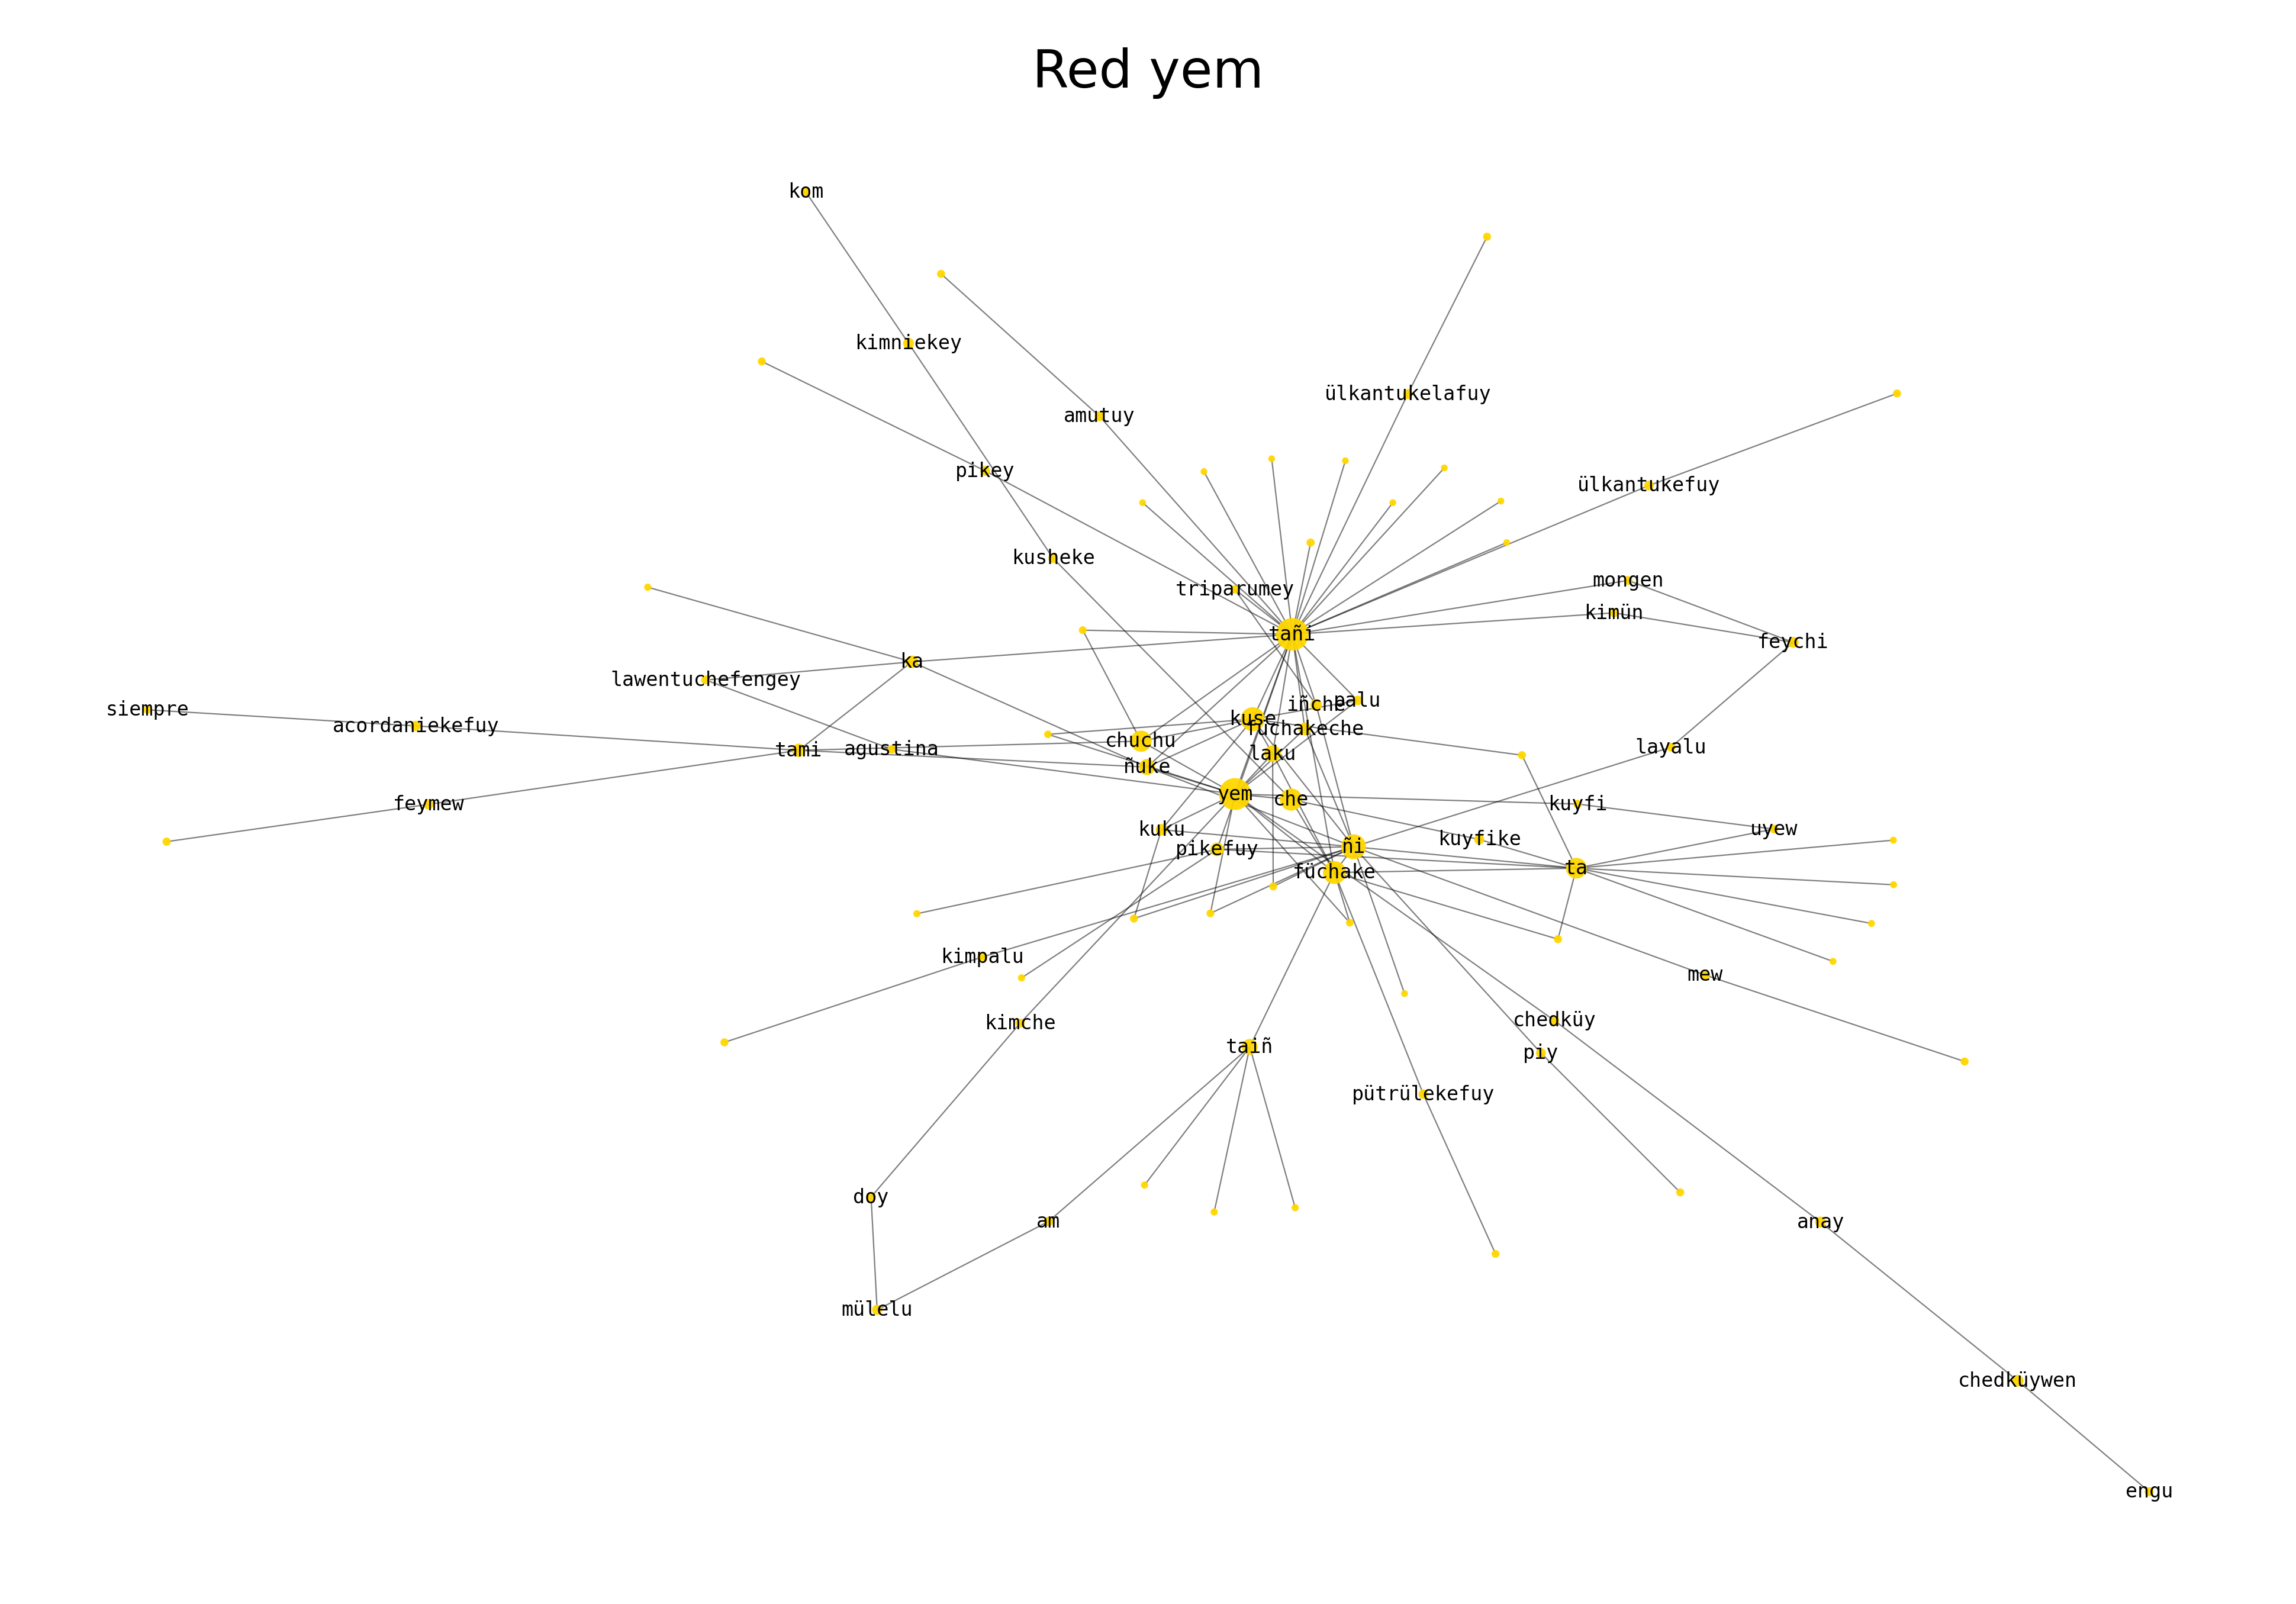

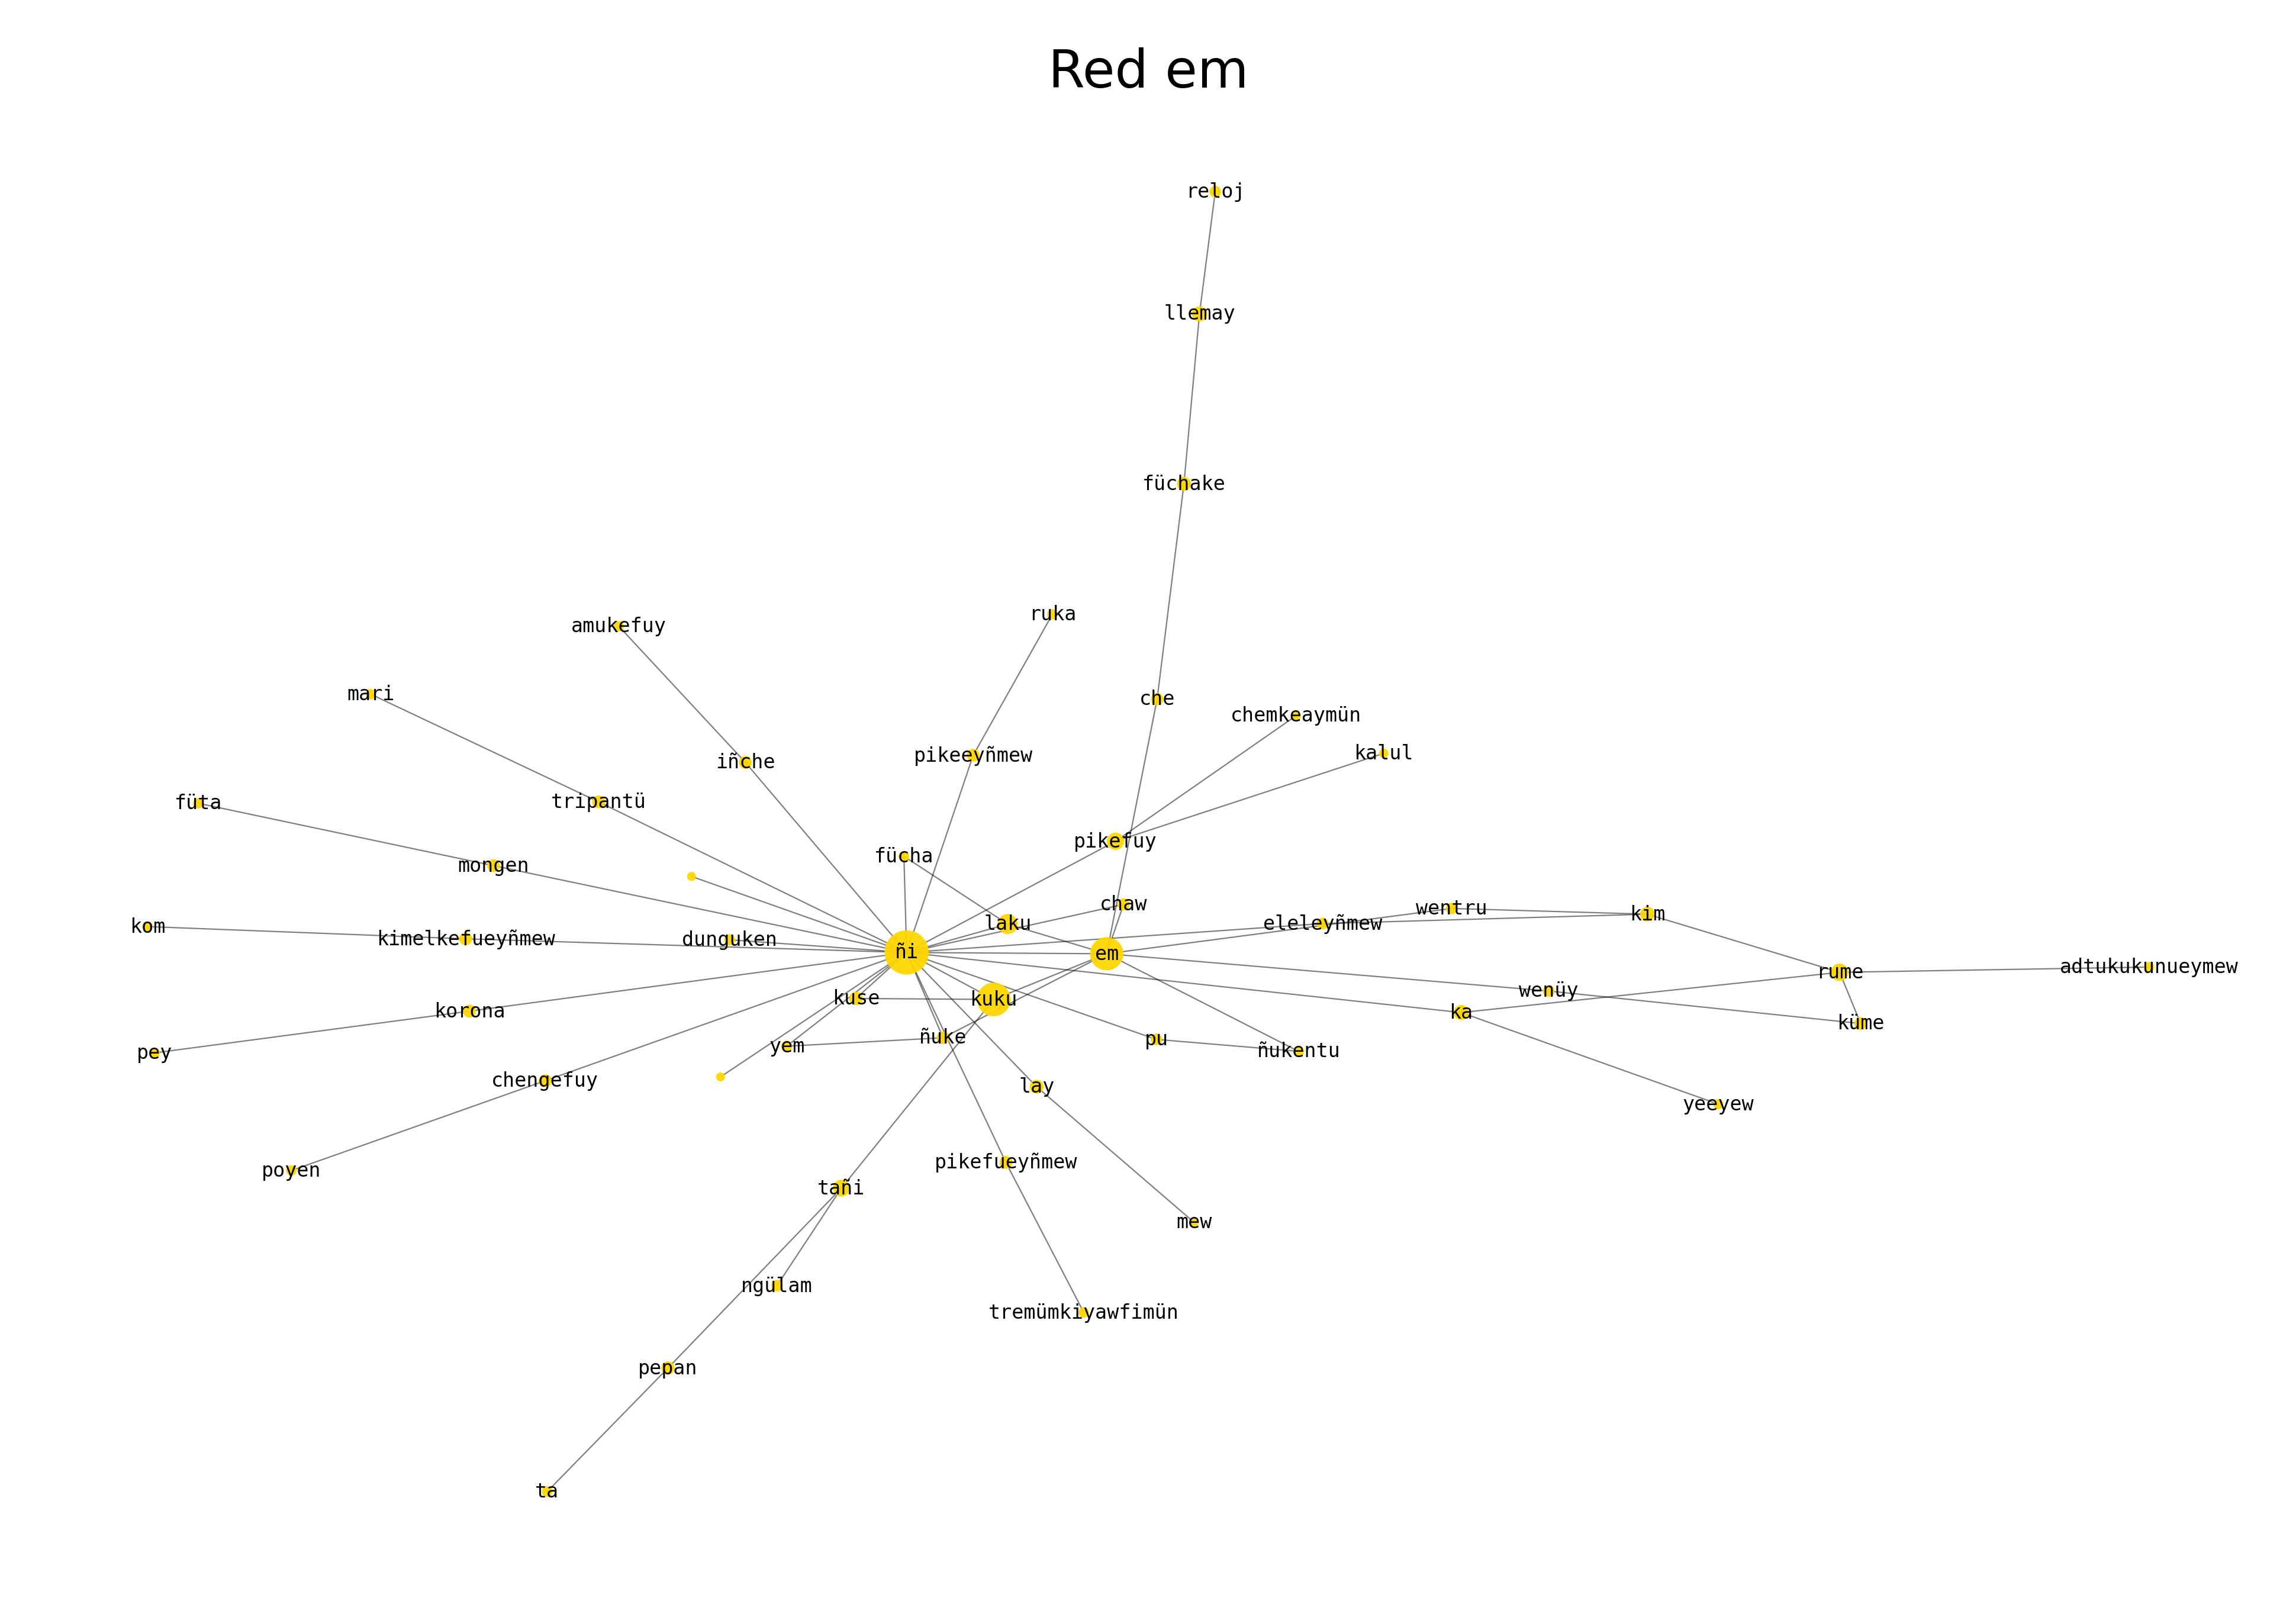

In [106]:
for Y in grafos.keys():
    plotG_centrality(Y,250)

In [82]:
## función para ranquear co-ocurrencias :)

def ranking(palabra,k):
    red = grafos[palabra]
    return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]

In [104]:
## palabras más cercanas a -em en el corpus misional

for Y in grafos.keys():
    print(Y,ranking(Y,10))

yem ['che', 'chuchu', 'laku', 'ñuke', 'füchakeche', 'kuku', 'palu', 'mama', 'weychafe', 'kuyfi']
em ['kuku', 'laku', 'chaw', 'ñuke', 'wenüy', 'wentru', 'ñukentu', 'che']


KeyError: 'ema'

### Cálculos con el corpus

In [58]:
##Cuantificación

print('Resultados')
print('  ')  

print('Cantidad de palabras')


tokens = []
for palabra in palabras:
        tokens += [palabra]
print(len(tokens))
print('  ')     


print('Cantidad de palabras únicas')


print(len(set(tokens)))
print('  ')     

print('relación')
    

print(len(set(tokens))/len(tokens))
print('  ')     

#contabilizar yem

Yem = {'yem':0,'ema':0,'em':0} 
for key in Yem.keys():
    Yem[key]=tokens.count(key)

print('Cantidad de yem')
 

print(Yem)

Resultados
  
Cantidad de palabras
31147
  
Cantidad de palabras únicas
5369
  
relación
0.17237615179632068
  
Cantidad de yem
{'yem': 56, 'ema': 0, 'em': 26}


In [48]:
tokens

['ramtueyu',
 'kiñeke',
 'pichi',
 'dungu',
 'mapudungun',
 'mew',
 'fey',
 '¿chew',
 'küdawmekeymi',
 'eymi',
 'iñche',
 'ta',
 'küdawlepun',
 'ta',
 'küdawlepun',
 'ta',
 'chillan',
 'chillan',
 'waria',
 'mew',
 'chillan',
 'waria',
 'mew',
 'müley',
 'ta',
 'pal',
 'norte',
 'piy',
 'ta',
 'wingka',
 'ka',
 'chummekeymi',
 'petu',
 'küdawmen',
 'ta',
 'uyew',
 'dewmameken',
 'ta',
 'pichike',
 'plaza',
 'anukunuam',
 'ta',
 'che',
 'yawfutuam',
 'ta',
 'che',
 'ka',
 'nienoam',
 'ta',
 'müte',
 'ta',
 'trufur',
 'ta',
 'ruka',
 'mew',
 'konnoam',
 'ta',
 'trufur',
 'cementangey',
 'ta',
 'chi',
 'calle',
 'anumngealu',
 'pichike',
 'matita',
 'mamüll',
 'plantayalu',
 'ta',
 'chi',
 'müna',
 'küme',
 'dungu',
 'ka',
 'chumley',
 'tüfachi',
 'küdaw',
 '¿küme',
 'küdaw',
 '¿weda',
 'küdaw',
 'küme',
 'küme',
 'küdaw',
 'antü',
 'müten',
 'müna',
 'weda',
 'müna',
 'fuertengey',
 'chi',
 'antü',
 'müna',
 'arengey',
 'arengey',
 'müna',
 'arengey',
 'uuuuu',
 'ka',
 'tüfachi',
 'küdaw